In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [191]:
df = pd.read_csv('C:/uber.csv')
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [192]:
df.drop(columns=["key", "Unnamed: 0"], inplace=True)

In [193]:
df.isnull()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
199995,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False


In [194]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [195]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(), inplace=True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(), inplace=True)

In [196]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [197]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [198]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [199]:
df = df.assign(hour = df.pickup_datetime.dt.hour,
               day = df.pickup_datetime.dt.day,
               month = df.pickup_datetime.dt.month,
               year = df.pickup_datetime.dt.year,
               dayofweek = df.pickup_datetime.dt.dayofweek)

In [200]:
import math

def haversine_distance(latitude1, longitude1, latitude2, longitude2):
    travel_dist = []
    for i in range(len(latitude1)):
        lat1 = latitude1[i]
        lon1 = longitude1[i]
        lat2 = latitude2[i]
        lon2 = longitude2[i]

        lat_dist = lat2 - lat1
        lon_dist = lon2 - lon1

        a = math.sin(lat_dist/2)**2 + math.cos(lat1)*math.cos(lat2)*math.sin(lon_dist/2)**2
        # radius of earth = 6371
        c = 2*math.asin(math.sqrt(a))*6371
        travel_dist.append(c)

    return travel_dist
    

In [201]:
df['dist_travelled'] = haversine_distance(df.pickup_latitude.to_numpy(), df.pickup_longitude.to_numpy(), df.dropoff_latitude.to_numpy(), df.dropoff_longitude.to_numpy())

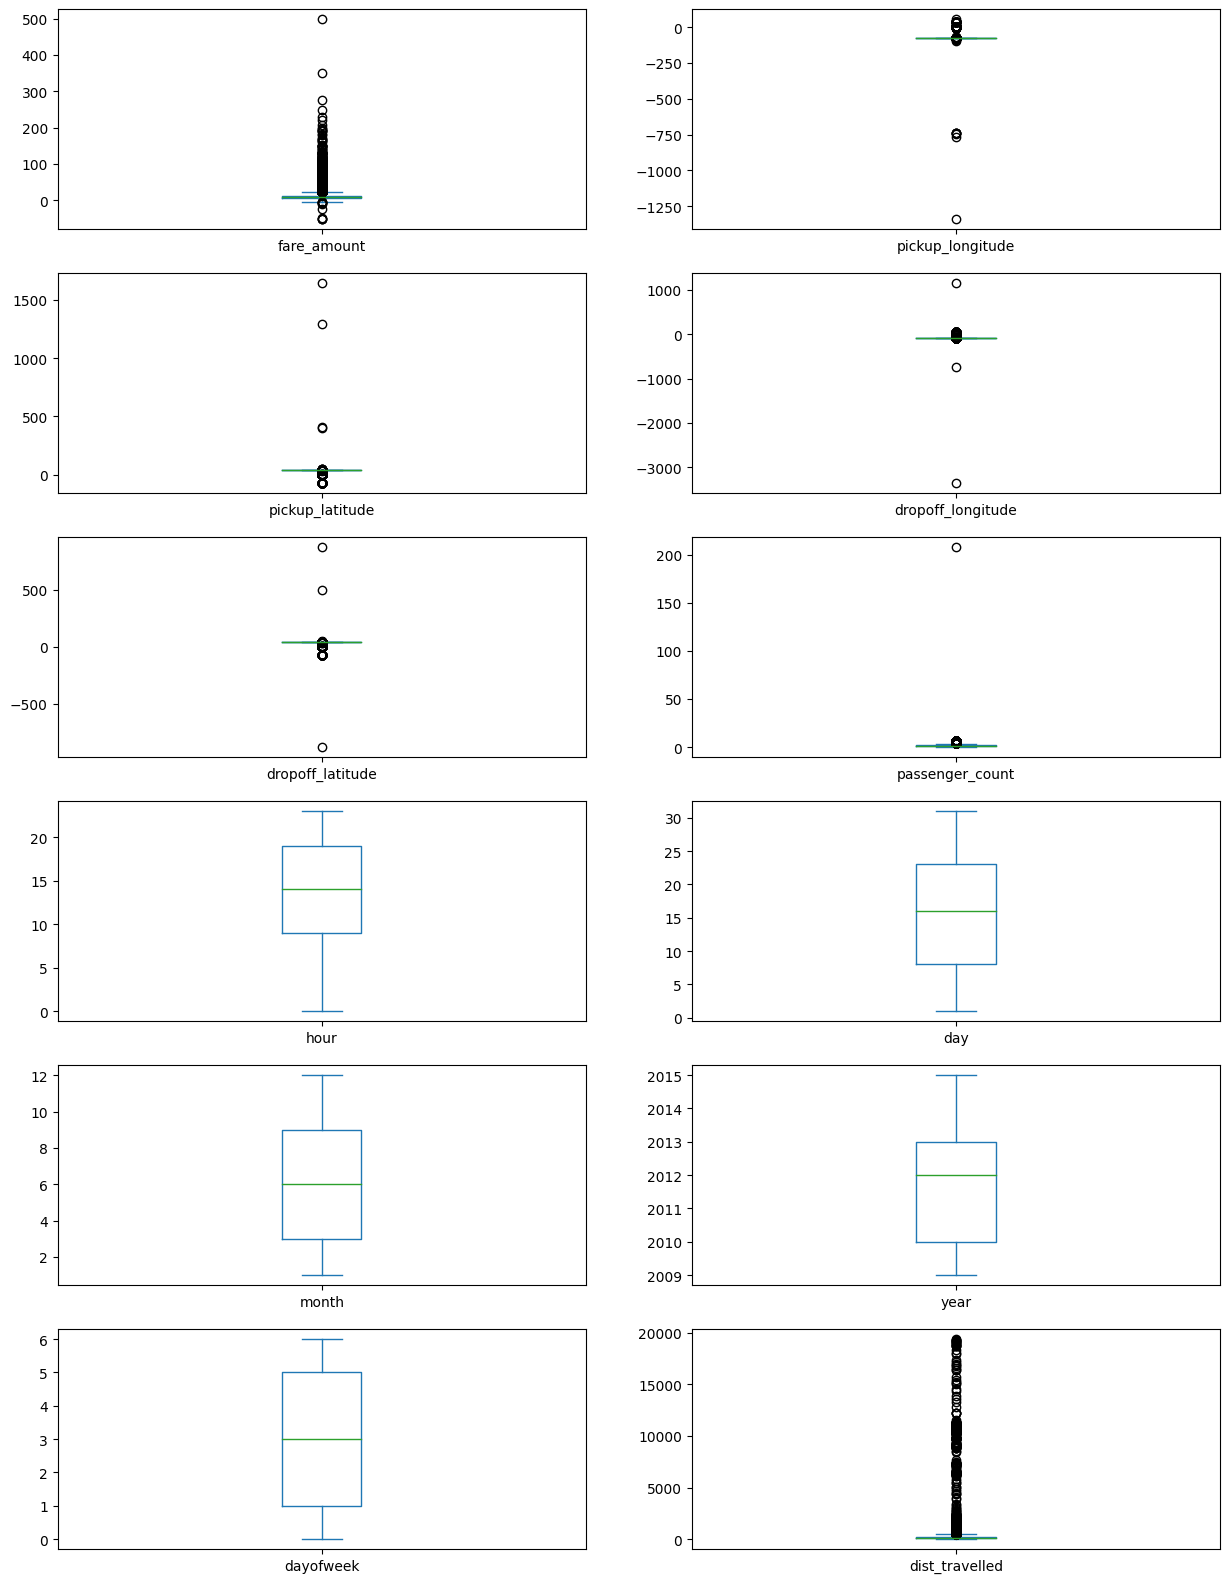

In [202]:
df.plot(kind='box', subplots=True, layout=(6,2), figsize=(15,20))
plt.show()

In [203]:
def removeOutliers(df1, col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)

    IQR = Q3-Q1

    lower_whisker = Q1 - 1.5*IQR
    upper_whisker = Q3 + 1.5*IQR
    df1[col] = np.clip(df1[col], lower_whisker, upper_whisker)
    return df1

In [204]:
def treat_outliers(df1, col_list):
    for c in col_list:
        df1 = removeOutliers(df1, c)
    return df1

In [205]:
df = treat_outliers(df, df.iloc[: , 0::])

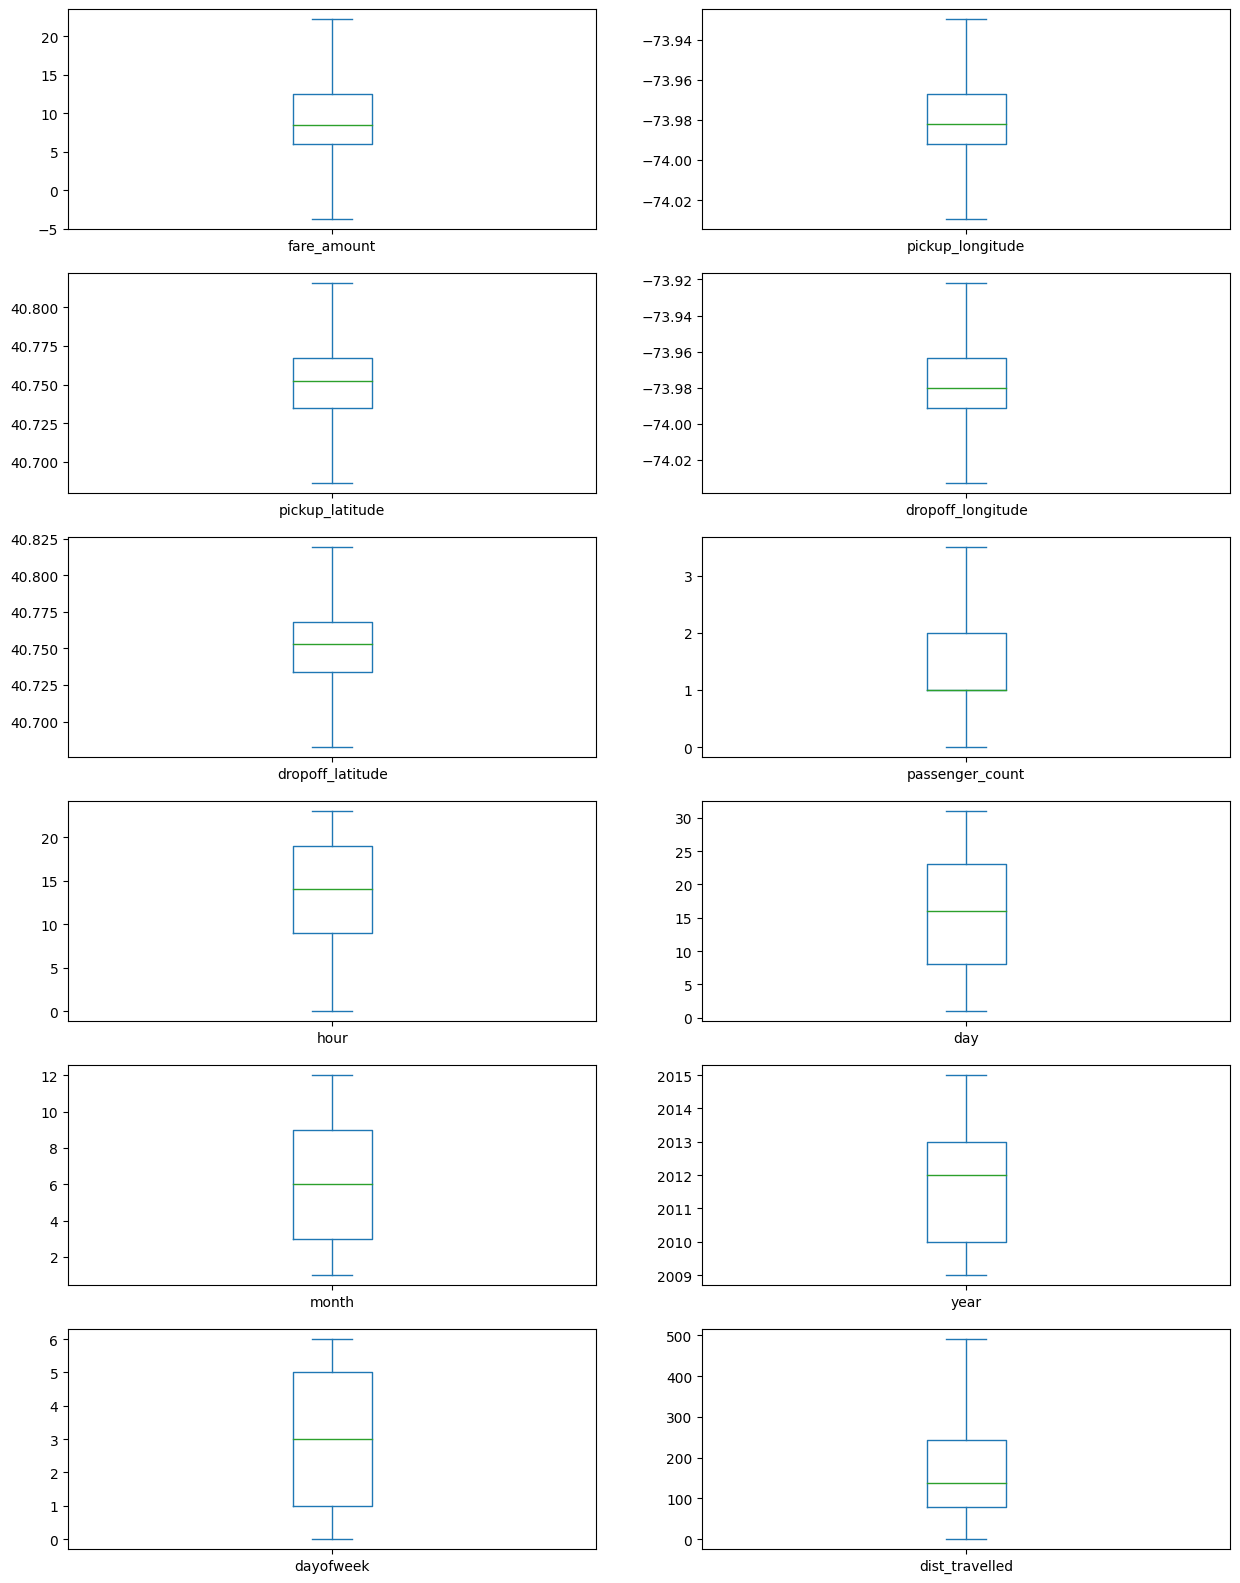

In [206]:
df.plot(kind='box', subplots=True, layout=(6,2), figsize=(15,20))
plt.show()

In [207]:
corr = df.corr()
corr

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travelled
fare_amount,1.000000,0.146982,0.154069,-0.110842,0.218675,-0.125898,0.015778,-0.023623,0.004534,0.030817,0.141277,0.013652,0.845015
pickup_datetime,0.146982,1.000000,0.010404,-0.014087,0.011714,-0.009879,-0.008159,0.002024,-0.002073,0.038523,0.987982,0.004834,0.026491
pickup_longitude,0.154069,0.010404,1.000000,0.259497,0.425619,0.073290,-0.013213,0.011579,-0.003204,0.001169,0.010198,-0.024652,0.106934
pickup_latitude,-0.110842,-0.014087,0.259497,1.000000,0.048889,0.515714,-0.012889,0.029681,-0.001553,0.001562,-0.014243,-0.042310,-0.041493
dropoff_longitude,0.218675,0.011714,0.425619,0.048889,1.000000,0.245667,-0.009303,-0.046558,-0.004007,0.002391,0.011346,-0.003336,0.204034
dropoff_latitude,-0.125898,-0.009879,0.073290,0.515714,0.245667,1.000000,-0.006308,0.019783,-0.003479,-0.001193,-0.009603,-0.031919,-0.032972
passenger_count,0.015778,-0.008159,-0.013213,-0.012889,-0.009303,-0.006308,1.000000,0.020274,0.002712,0.010351,-0.009749,0.048550,0.008813
hour,-0.023623,0.002024,0.011579,0.029681,-0.046558,0.019783,0.020274,1.000000,0.004677,-0.003926,0.002156,-0.086947,-0.041921
day,0.004534,-0.002073,-0.003204,-0.001553,-0.004007,-0.003479,0.002712,0.004677,1.000000,-0.017360,-0.012170,0.005617,0.002648
month,0.030817,0.038523,0.001169,0.001562,0.002391,-0.001193,0.010351,-0.003926,-0.017360,1.000000,-0.115859,-0.008786,0.011479


In [209]:
df_x = df[['pickup_longitude', 'pickup_latitude', 'dropoff_latitude', 'dropoff_longitude', 'hour', 'day', 'month', 'year', 'dayofweek', 'passenger_count', 'dist_travelled']]
df_y = df['fare_amount']

In [217]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=42)

In [219]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [220]:
y_pred = reg.predict(x_test)
print(y_pred)

[ 7.89523628  7.80949047  8.02709651 ... 11.91469519  7.57385947
  7.31157793]


In [223]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)

rf.fit(x_train, y_train)

RandomForestRegressor()

In [224]:
y_predrf = rf.predict(x_test)
print(y_predrf)

[ 6.275  11.9905  8.002  ... 15.125   8.098   7.525 ]


In [226]:
from sklearn import metrics
from sklearn.metrics import r2_score

reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
reg_r2score = r2_score(y_test, y_pred)

print(reg_RMSE)
print(reg_r2score)

rf_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_predrf))
rf_r2score = r2_score(y_test, y_predrf)

print(rf_RMSE)
print(rf_r2score)


2.780221380336376
0.738725489999357
2.4294156564660456
0.8005004427041668
